In [1]:
from eye_model_v1 import Eye_Net
from cosine_annealing_warmup import CosineAnnealingWarmupRestarts 
import torch
import matplotlib.pyplot as plt

/home/jovyan/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# model_key =  "mobilenetv3_small_050"
# lr =  0.0001
# epochs =  200
# input_dim =  80
# weight_decay =  0.0001
# first_cycle_steps =  15
# cycle_mult =  4
# max_lr =  0.005
# min_lr =  0.0001
# warmup_steps =  5
# gamma =  0.5

In [2]:
def check_plot():
    # setup model - from scratch or load model for finetune
    model = Eye_Net(
        model_key = model_key,
        in_channel = 3
    )

    # setup optimizer and LR scheduler
    optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
    scheduler = CosineAnnealingWarmupRestarts(optimizer,
                                              first_cycle_steps=first_cycle_steps,
                                              cycle_mult=cycle_mult,
                                              max_lr=max_lr,
                                              min_lr=min_lr,
                                              warmup_steps=warmup_steps,
                                              gamma=gamma)

    lrs=[]
    for epoch in range(epochs):
        lrs.append(scheduler.get_lr()[0])
        scheduler.step()   

    plt.figure(figsize=(10,5))
    plt.plot(lrs)
    plt.show()

In [ ]:

num_workers: 16
seed: 1
lr: 
batch_size: 1024
epochs: 300
class_weights: "[0.487109,0.205199,0.307692]"

input_dim: 80
weight_decay: 0.00001
first_cycle_steps: 10
cycle_mult: 4
max_lr: 
min_lr: 
warmup_steps: 5
gamma: 0.5

In [ ]:
first_cycle_steps: 25
cycle_mult: 3.5
max_lr: 0.00005
min_lr: 0.0000001
warmup_steps: 7
gamma: 0.5
0.00001

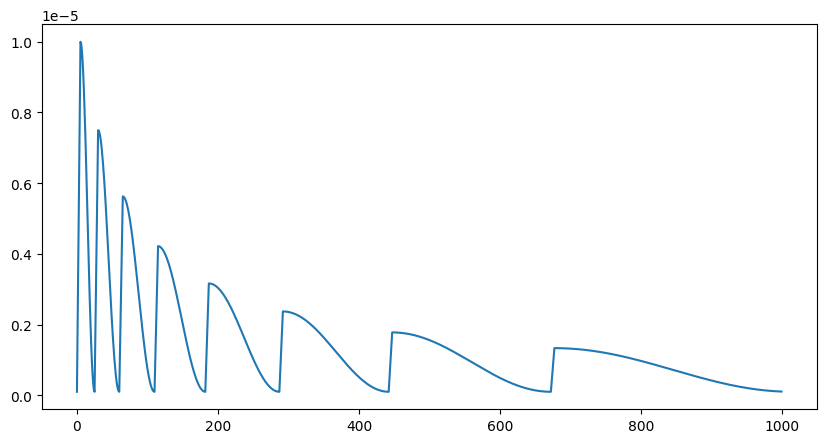

In [57]:
model_key =  "mobilenetv3_small_050"
lr =  0.00001
epochs =  1000
input_dim =  80
weight_decay =  0.00001
first_cycle_steps =  25
cycle_mult =  1.5
max_lr =  0.00001
min_lr =  0.0000001
warmup_steps =  5
gamma =  0.75

check_plot()